In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [2]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
nnblist = sorted(glob.glob('*BLN*nnb.npy*')) 
binlist = sorted(glob.glob('*BLN*binarised*.npy*')) 
shufflist =  sorted(glob.glob('*shuffle*.npy*')) 
binlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590binarised.npy']

In [27]:
nnblist = sorted(glob.glob('*E-02*PTZ20*nnb.npy*')) 
nnblist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy']

In [31]:
nnblist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.16nnb.npy']

In [24]:
for i in range(len(liklist)):
    print(liklist[i] + str(np.load(liklist[i],allow_pickle=True).shape))
    prac = np.load(liklist[i], allow_pickle=True)
    for i in range(prac.shape[0]):
        if type(prac[i]) is int:
            print(i)
            break

PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_marglik_logn.npy(200, 5)
PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_marglik_power.npy(200, 4)
PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_marglik_logn.npy(200,)
150
PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_marglik_power.npy(200,)
150
PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_marglik_logn.npy(200, 5)
PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_marglik_power.npy(200, 4)
PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_marglik_logn.npy(200, 5)
PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_marglik_power.npy(200, 4)
PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_marglik_logn.npy(200, 5)
PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_marglik_power.npy(200, 4)
PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_marglik_logn.npy(200, 5)
PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_marglik_power.npy(200, 4)
PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_marglik_logn.npy(200, 5)
PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_

In [21]:
prac = np.load(liklist[2], allow_pickle=True)
for i in range(prac.shape[0]):
    if type(prac[i]) is int:
        print(i)
        break

150


In [18]:
type(prac[160]) is int

True

In [3]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
liklist = sorted(glob.glob('*marglik*'))
avlist = sorted(glob.glob('*-02*BLN*_av.npy*'))

In [3]:
num1 = adfn.name_zero('front', 2,12,1)
num1

['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [15]:
np.min(sizes)

1

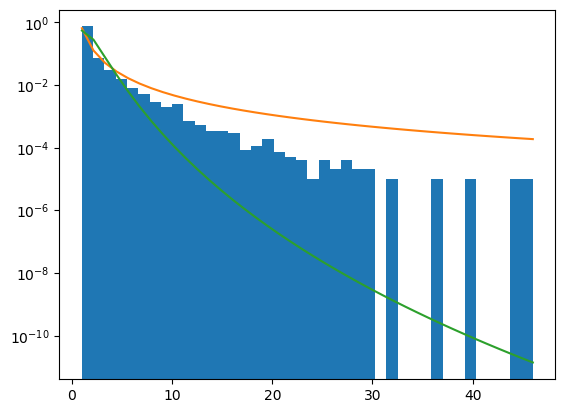

power = -117768.18040269842  log = -107061.67224011943   LLR = -10706.50816257899  alpha = 2.130151836630273


In [39]:
avlist =  sorted(glob.glob('*-' + num1[3] + '*BLN*_av.npy'))
data = np.load(avlist[0])
sizes=data[1]
M=len(sizes)
a=min(sizes) #define xmin
b=max(sizes) #define xmax
npart = 2000 #number of particles - number of draws from prior distribution
ln=IS_LN(npart)
po=IS(npart)
plotcomp(po[0],ln[0],ln[1])
print('power = ' + str(po[1]), ' log = ' + str(ln[2]) + '   LLR = ' + str(po[1] - ln[2]) + '  alpha = ' + str(po[0]))

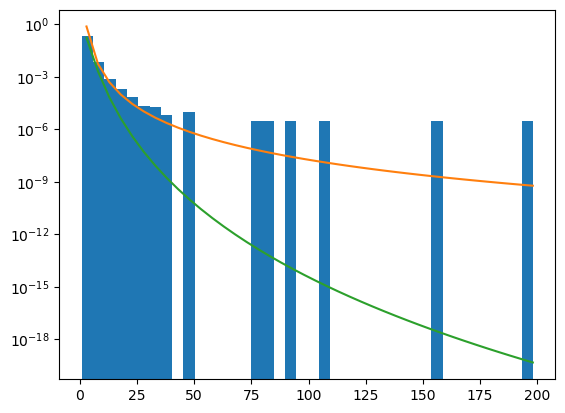

power = 140186.0732205296  log = -99869.09112842142   LLR = 240055.16434895102  alpha = 4.999974965288212


In [42]:
avlist =  sorted(glob.glob('*-' + num1[0] + '*BLN*_av.npy'))
data = np.load(avlist[0])
sizes=data[1]
M=len(sizes)
a=3 #define xmin
b=max(sizes) #define xmax
npart = 2000 #number of particles - number of draws from prior distribution
ln=IS_LN(npart)
po=IS(npart)
plotcomp(po[0],ln[0],ln[1])
print('power = ' + str(po[1]), ' log = ' + str(ln[2]) + '   LLR = ' + str(po[1] - ln[2]) + '  alpha = ' + str(po[0]))

In [32]:
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[1]
    M=len(sizes)
    a=2 #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09


In [4]:
import numpy as np 
import scipy.stats as stat
import matplotlib.pyplot as plt

#Functional form for power law
def powerlaw(n,lam):
    zeta=np.sum(1.0/np.arange(a,b+1)**lam)
    return(n**(-lam)/zeta)

#Functional form for lognormal
def lognormal(n,mu,sig):
    return(1.0/n/np.sqrt(2*np.pi*sig**2)*np.exp(-(np.log(n)-mu)**2/(2*sig**2)))


#Calculate loglikelihood for power law given the data
#Loglikelihoods across all random draws, given your data
def LogLikelihood(lam):
    #normalisation factor for all lambda draw - normalises a distribution to sum of probability = 1
    zetamat=np.power.outer(1.0/np.arange(a,b+1),lam) #Matrix of normalisation constants for each lambda draw: each row =  size**-current lambda, for every size from max to min
    zeta=np.sum(zetamat,0) #Norm vector - sum of norm constants for entire max-min range at each lambda
    norm=-M*np.log(zeta) #Contribution of zeta to the likelihood
    nprod=-lam*np.sum(np.log(sizes)) #Loglikelihood calculation, given the data
    loglik=nprod+norm #Normalised loglikelihood
    return(loglik) 

#Calculate loglikelihood for lognormal
#Loglikelihoods across all random draws, given your data
def LogLikelihood_LN(mu,sig):
    T1 = -np.sum(np.log(sizes))
    T2_mat = np.subtract.outer(np.log(sizes),mu)**2
    T2 = -np.sum(T2_mat,0)/(2*sig**2)
    T0 = -M*np.log(np.sqrt(2*np.pi) * sig )
    loglik=T0+T1+T2
    return(loglik) 


#IMPORTANCE SAMPLER - for power law
#OUTPUT - posterior average exponent, log marginal likelihood, effective sample size = how good is the sampler
def IS(npart):
    lambda_sample=np.random.uniform(0.1,5,npart) #randomly sample across possible lambda values

    #Prior (norm) = shift random sample lambda values into a normal distribution of given range
    #Proposal (uniform) = shift random sample lambda values into a uniform distribution of given range     
    #Weights - weight the range of sample values for each distribution with the likelihood weights 
    #Prior value*likelihood divided by proposal value - cancel out the effect of the proposal
    weights=LogLikelihood(lambda_sample)+stat.norm.logpdf(lambda_sample,1,3)-stat.uniform.logpdf(lambda_sample,0.1,5) #Log of weights
    maxw=np.max(weights)
    w2 = np.exp(weights-maxw)
    w2_sum = np.sum(w2)
    ESS=1.0/(np.sum((w2/w2_sum)**2))
    mean_lambda = np.dot(lambda_sample,w2)/w2_sum #average of the lambda value for the posterior distribution
    #marginal likelihood = empirical means of all the weights
    marglik = maxw + np.log(np.sum(np.exp(weights-maxw)))-np.log(npart) #Take the exponent of logs to unlog, before summing/then divded by ncounts
    return([mean_lambda, marglik, LogLikelihood(lambda_sample), ESS])

#IMPORTANCE SAMPLER - for lognormal
#OUTPUT - posterior average exponent, log marginal likelihood, effective sample size = how good is the sampler
def IS_LN(npart):
    mu_sample = np.random.uniform(-2.0,2.0,npart) #randomly sample across possible mu
    sig_sample = np.random.uniform(0.1,5.0,npart) #randomly sample across possible sigma
    weights=LogLikelihood_LN(mu_sample,sig_sample)
    maxw=np.max(weights)
    w2 = np.exp(weights-maxw)
    w2_sum = np.sum(w2)
    ESS=1.0/(np.sum((w2/w2_sum)**2))
    wmax_ID=np.argmax(w2)
    mean_mu = mu_sample[wmax_ID]
    mean_sig = sig_sample[wmax_ID]
    #marginal likelihood = empirical means of all the weights
    marglik = maxw + np.log(np.sum(np.exp(weights-maxw)))-np.log(npart)
    return([mean_mu,mean_sig, marglik,  LogLikelihood_LN(mu_sample, sig_sample), ESS])

#find entire posterior dsitr - posterior distribution - range of values 
def plot_samples(npart):
    lambda_sample=np.random.uniform(0.1,5,npart)
    weights=LogLikelihood(lambda_sample)
    maxw=np.max(weights)
    w2 = np.exp(weights-maxw)
    plt.hist(lambda_sample,weights=w2,bins=np.linspace(2.5,2.8))
    plt.show()

def plotcomp(lam,mu,sig):
    x = np.linspace(a,b,40) 
    plt.hist(sizes,40,log=True,density=True)
    plt.plot(x,powerlaw(x,lam))
    plt.plot(x,lognormal(x,mu,sig))
    plt.show()

### Sliding window branching ratio - within window, above average for PTZ?


In [15]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
branchlist = sorted(glob.glob('*4*PTZ20*branch*'))
branchlist

[]

In [16]:
num = adfn.name_zero('front', 2, 12, 1)
for i in num:
    branchlist = sorted(glob.glob('*-' + i + '*PTZ20*branch.npy*'))
    print(len(branchlist))


0
192
0
0
0
0
0
0
0
0
0


In [ ]:
sorted(glob.glob('*-' + i + '*PTZ20*nnbpkg.npy*'))[:200]

In [ ]:
# Avalanche calculation
#---------------------------------------------------------------------------
num = adfn.name_zero('front', 7, 12, 1)
for i in num:
    blnpkglist = sorted(glob.glob('*-' + i + '*PTZ20*nnbpkg.npy*'))[:200] #iterated list - binarised trace
    blnavlist = sorted(glob.glob('*-' + i + '*PTZ20*nnbav.npy*')) [:200]
    paramlist = [F10t, experiment]
    adfn.parallel(4,[blnpkglist, blnavlist] ,crfn.branch, paramlist)

doing time step 0 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.04nnbpkg.npy
doing time step 0 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.05nnbpkg.npy
doing time step 0 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.06nnbpkg.npy
doing time step 0 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.07nnbpkg.npy
doing time step 491 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.04nnbpkg.npy
doing time step 491 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.05nnbpkg.npy
doing time step 491 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.06nnbpkg.npy
doing time step 491 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.07nnbpkg.npy
doing time step 982 of 4914 for fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_0.470bin0.04nnbpkg.npy
doing time step 98